In [42]:
### IMPORTING NECESSARY LIBRARIES 

import pandas as pd
import numpy as np

import random
import matplotlib as mpl
import matplotlib.pyplot as plt



from sklearn.datasets import fetch_openml

from sklearn.base import clone
from sklearn.base import BaseEstimator

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import SGDClassifier



##### THE MNIST DATASET

The (Modified National Institute of Standards and Technology) MNIST Dataset is a set of 70,000 small images of handwritten numeric digits of the shape 28x28 (784 pixels). <br>
Each digit in the 784 pixels is from 0 (white) to 255 (black)

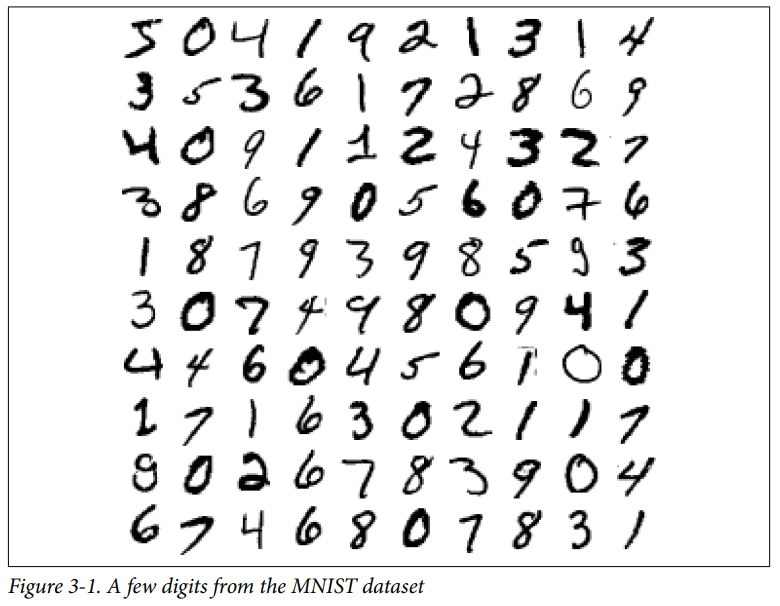

In [4]:

mnist = fetch_openml('mnist_784', version = 1)

In [44]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [45]:
### Setting the datapoints and the target variables from the dataset into X and y
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X.iloc[0].shape

(784,)

1


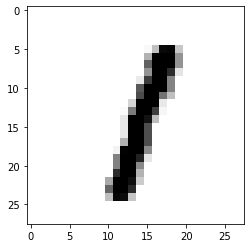

In [46]:
### Viewing the images of 28x28 handwritten numbers

random_num = random.randint(0,X.shape[0])
print(y[random_num])

some_digit = np.array(X.iloc[random_num])
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("on")
plt.show()


In [47]:
#### TRAIN TEST SPLIT 6:1
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [48]:
#### BINARY CLASSIFIER
# Creating a Binary Classification Model to identify if the Number in MNIST is 5 or not

y_train_5 = (y_train==5)
y_test_5 = (y_test==5)


### Using the Stochastic Gradient Descent Classifier for Classification
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [49]:
random_num = random.randint(0,X.shape[0])
print(y[random_num])

some_digit = np.array(X.iloc[random_num])
sgd_clf.predict([some_digit])

4


c:\Users\70049282\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [50]:
#### PERFORMANCE MEASURES


# CROSS VALIDATION FROM SCRATCH
skfolds = StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)

    print(len(train_index), len(test_index))
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5[train_index]
     
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5[test_index]


    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)

    # Accuracy
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

40000 20000
0.95035
40000 20000
0.96035
40000 20000
0.9604


In [51]:
### The previous scracth implementation roughly matches the cross_val_score() function
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [52]:
"""
 The Accuracy Seems to be really Good! already at an average of 95%
 But lets compare it to a very dumb classifier that always predicts that the number is not 5
 
"""
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X),1), dtype = bool)
    

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring = 'accuracy')

### This dumb classifier has an accuracy of 91% at average by just predicting that it is not 5
### This is because the number of Positive Class cases in the dataset is skewed

### This makes Accuracy not a very preferred metric for Classification on such datasets


array([0.91125, 0.90855, 0.90915])

In [53]:
#### CONFUSION MATRIX
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

 CONFUSION MATRIX

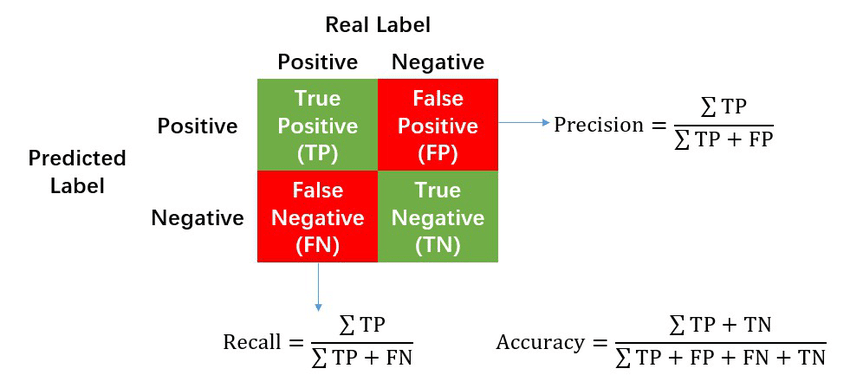

In [43]:
print("PRECISION: ", precision_score(y_train_5, y_train_pred))
print("RECALL: ", recall_score(y_train_5, y_train_pred))

PRECISION:  0.8285544495617293
RECALL:  0.8901835594573024
